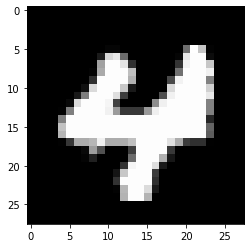

In [15]:
import numpy as np
import matplotlib.pyplot as plt

train_images = np.loadtxt('data/train_images.txt')        # incarcam imaginile
train_labels = np.loadtxt('data/train_labels.txt', 'int') # incarcam etichetele avand
                                                          # tipul de date int
image = train_images[0, :] # prima imagine 
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray') 
plt.show()

In [17]:
print(train_images.shape)

(1000, 784)


In [13]:
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'int')
print(test_images.shape)

(500, 784)


In [14]:
bins = np.linspace(0, 255, num= 5)
print(bins)

[  0.    63.75 127.5  191.25 255.  ]


In [20]:
def values_to_bins(x, bins):
    return np.digitize(x, bins) - 1

In [21]:
x_train = values_to_bins(train_images, bins)
x_test = values_to_bins(test_images, bins)

print(np.unique(x_train))

[0 1 2 3 4]


In [26]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, train_labels)
naive_bayes_model.predict(x_test)
naive_bayes_model.score(x_test, test_labels)

0.836

In [35]:
bins_list = [3, 5, 7, 9, 11, 95]
for bin in bins_list:
    bins = np.linspace(0, 255, num = bin)
    x_train = values_to_bins(train_images, bins)
    x_test = values_to_bins(test_images, bins)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(x_train, train_labels)
    print(bin, naive_bayes_model.score(x_test, test_labels))

3 0.826
5 0.836
7 0.842
9 0.842
11 0.842
95 0.846


In [37]:
bins_list = list(range(2, 1001))
opt_bin = 0
opt_val = 0
for bin in bins_list:
    bins = np.linspace(0, 255, num = bin)
    x_train = values_to_bins(train_images, bins)
    x_test = values_to_bins(test_images, bins)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(x_train, train_labels)
    val = naive_bayes_model.score(x_test, test_labels)
    if val > opt_val:
        opt_val = val
        opt_bin = bin
print(opt_bin, opt_val)
        
        

91 0.846
